## 1.1 Importing the required Libraries and the dataset

In [126]:
#Importing libraries
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#Importing the datasets
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

In [3]:
#To check highest value and lowest values
df.head(10).style.background_gradient(cmap="PuBuGn")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.400000,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.500000,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.300000,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.600000,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.900000,3,0,1,0,0,0,0


In [4]:
#To display top 5 rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#To display bottom 5 rows
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## 1.2 Check the types of the Data

In [6]:
# To find the dtypes in the DataFrame of each columns
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

## 1.3 Check Statistical Summary

In [7]:
# To view some basic statistical details.
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# Transpose of df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## 1.4 Check the shape of dataframe and null values

In [9]:
# To check the Dimensionality of the DataFrame
df.shape

(5000, 14)

In [10]:
# To check the total null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
# To check the counts of negative values in experience column
df[df['Experience'] < 0]['Experience'].count()

52

In [12]:
#To check the ammount of negative values
df[df['Experience'] < 0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [13]:
# Dropping the ID and Experience column
df.drop(['ID','Experience'],axis=1,inplace=True)

In [14]:
#To display top 5 rows
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [15]:
#To display bottom 5 rows
df.tail()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0
4999,28,83,92612,3,0.8,1,0,0,0,0,1,1


In [16]:
#To check the names of each column
df.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

# 3. EDA

In [17]:
#To check number of unique elements in each columns
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [18]:
#Drop the Zip Code Column
df.drop(['ZIP Code'], axis = 1) 

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [19]:
# Number of people with zero mortgage
df[df['Mortgage'] == 0]['Mortgage'].value_counts()

Mortgage
0    3462
Name: count, dtype: int64

In [20]:
# Number of people with zero credit card spending per month
df[df['CCAvg'] == 0]['CCAvg'].value_counts()

CCAvg
0.0    106
Name: count, dtype: int64

In [21]:
# Value counts of Family column
df['Family'].value_counts()

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

In [22]:
# Value counts of Securities Account column
df['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [23]:
# Value counts of CD Account column
df['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [24]:
# Value counts of CreditCard column
df['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [25]:
# Value counts of Education column
df['Education'].value_counts()

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

In [26]:
# Value counts of Online column
df['Online'].value_counts()

Online
1    2984
0    2016
Name: count, dtype: int64

## 3.1 Univariate Analysis

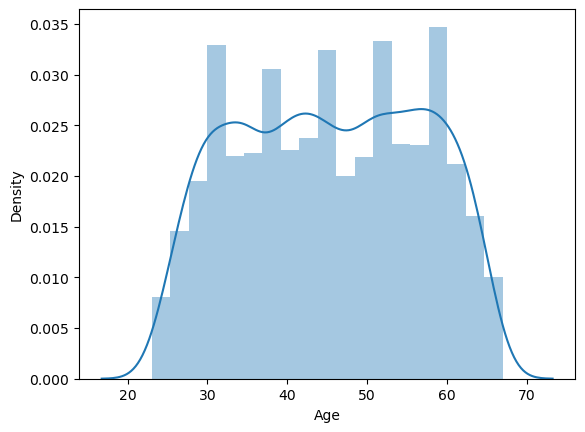

In [27]:
# Age have normal distributions
sns.distplot(df["Age"])
plt.show()

<Axes: xlabel='Income', ylabel='Density'>

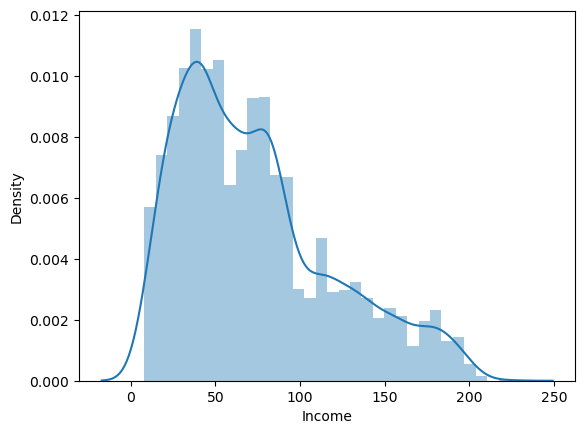

In [28]:
# Income is right skewed distributions
sns.distplot(df["Income"])

<Axes: xlabel='Mortgage', ylabel='Density'>

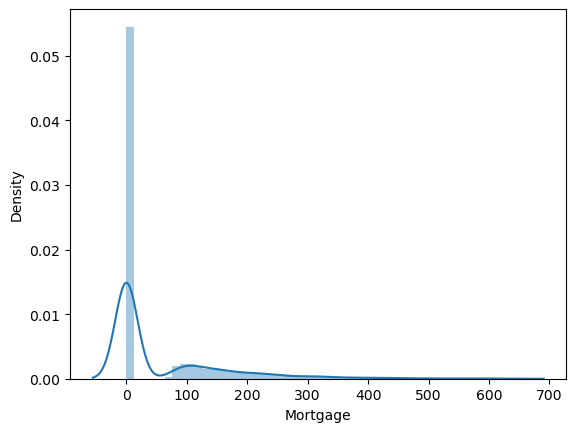

In [29]:
# Mortgage seems to be highly skewed 
sns.distplot(df["Mortgage"])

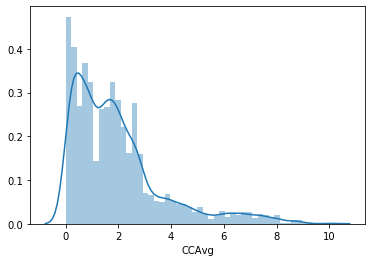

In [30]:
# Credit Card Average is right skewed distributions
sns.distplot(df["CCAvg"])

<Axes: xlabel='Family', ylabel='count'>

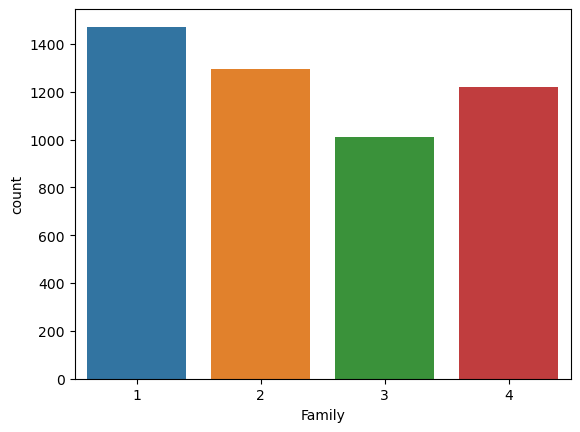

In [30]:
# Count Plot to show Family Distributions
sns.countplot(x='Family',data=df)

<Axes: xlabel='Education', ylabel='count'>

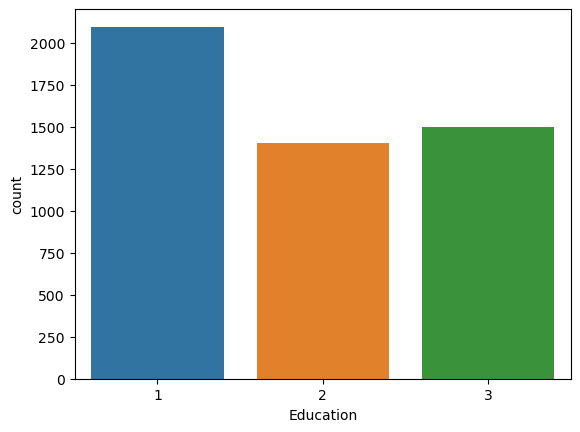

In [31]:
# Count Plot to show Education Distributions
sns.countplot(x='Education',data=df)

<Axes: xlabel='CreditCard', ylabel='count'>

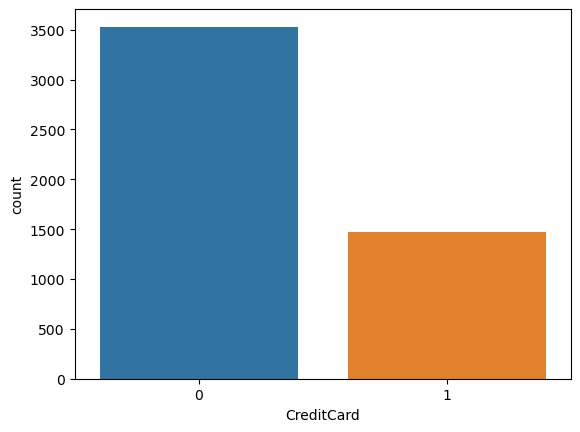

In [33]:
# Count Plot to show CreditCard Distributions
sns.countplot(x='CreditCard',data=df)

<Axes: xlabel='Online', ylabel='count'>

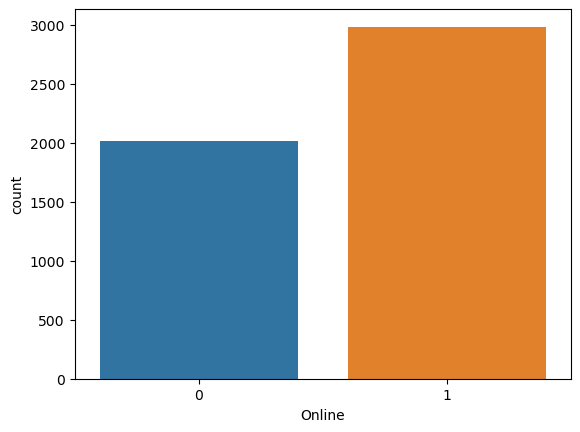

In [34]:
#  Count Plot to show Online Distributions
sns.countplot(x='Online',data=df)

## 3.2 Multivariate Analysis

<Axes: xlabel='Education', ylabel='Income'>

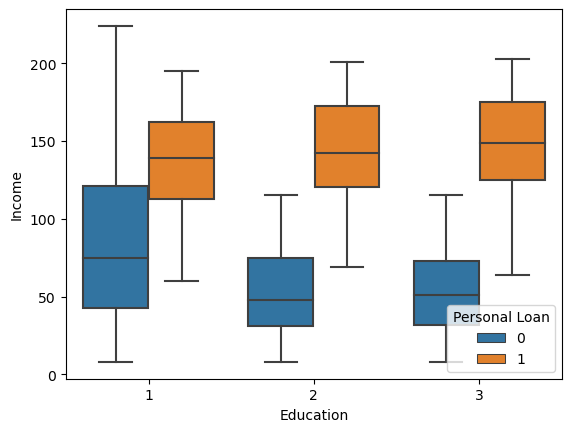

In [35]:
# Influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

<Axes: xlabel='Securities Account', ylabel='count'>

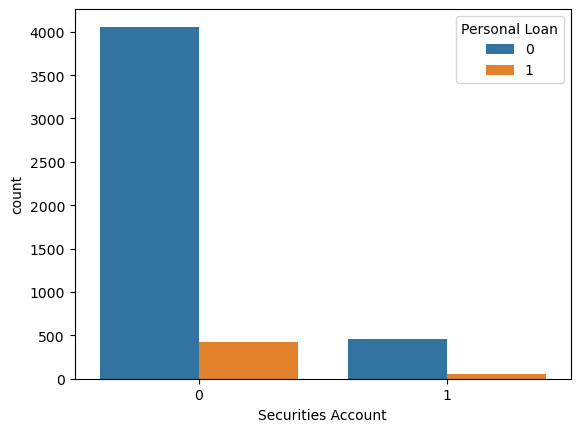

In [36]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

<Axes: xlabel='Family', ylabel='count'>

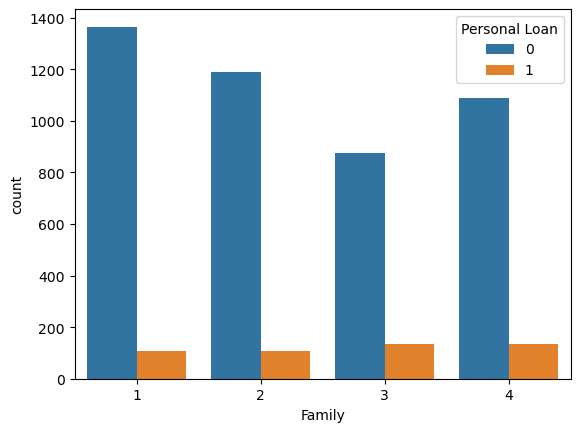

In [37]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

<Axes: xlabel='CD Account', ylabel='count'>

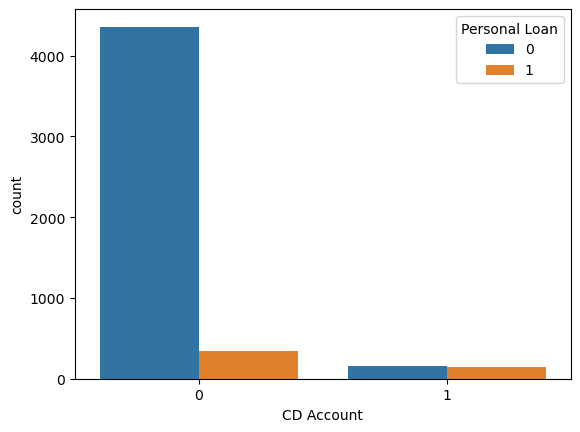

In [38]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

<Axes: >

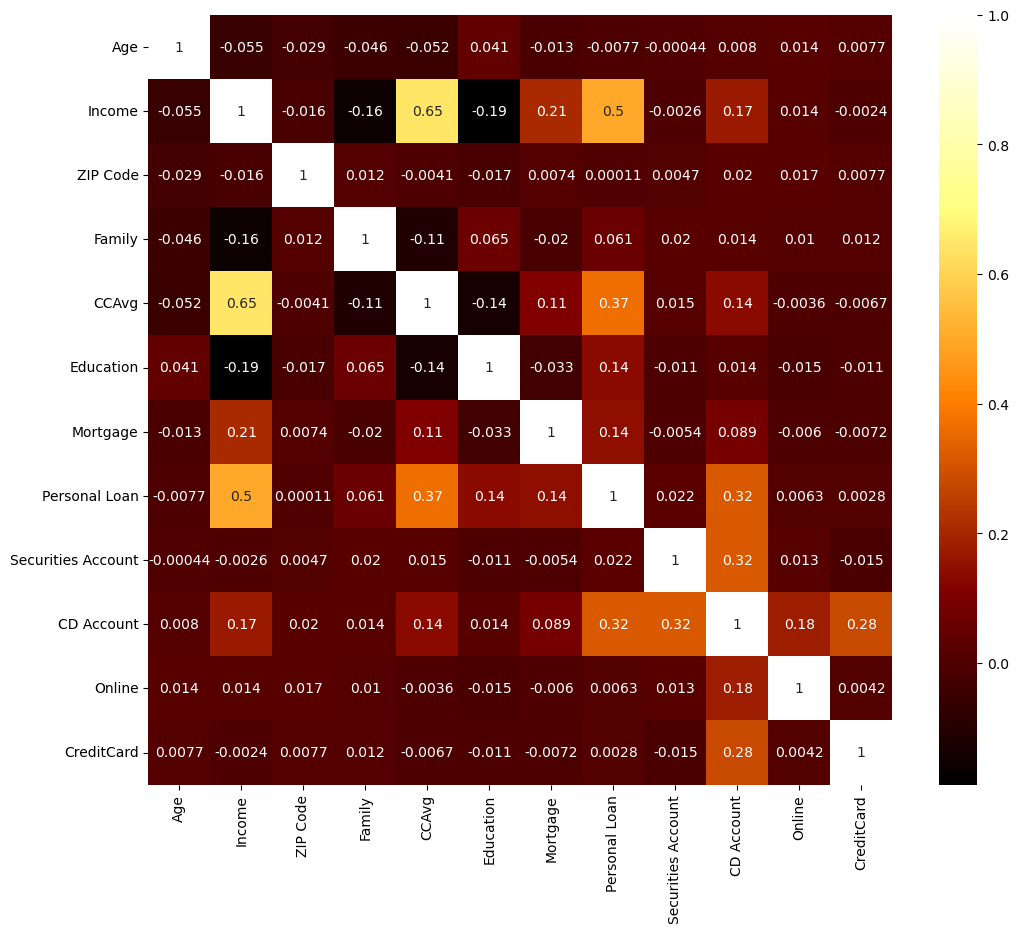

In [39]:
# CCAvg Credit average and income are highly correlated
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), cmap='afmhot' , annot = True)

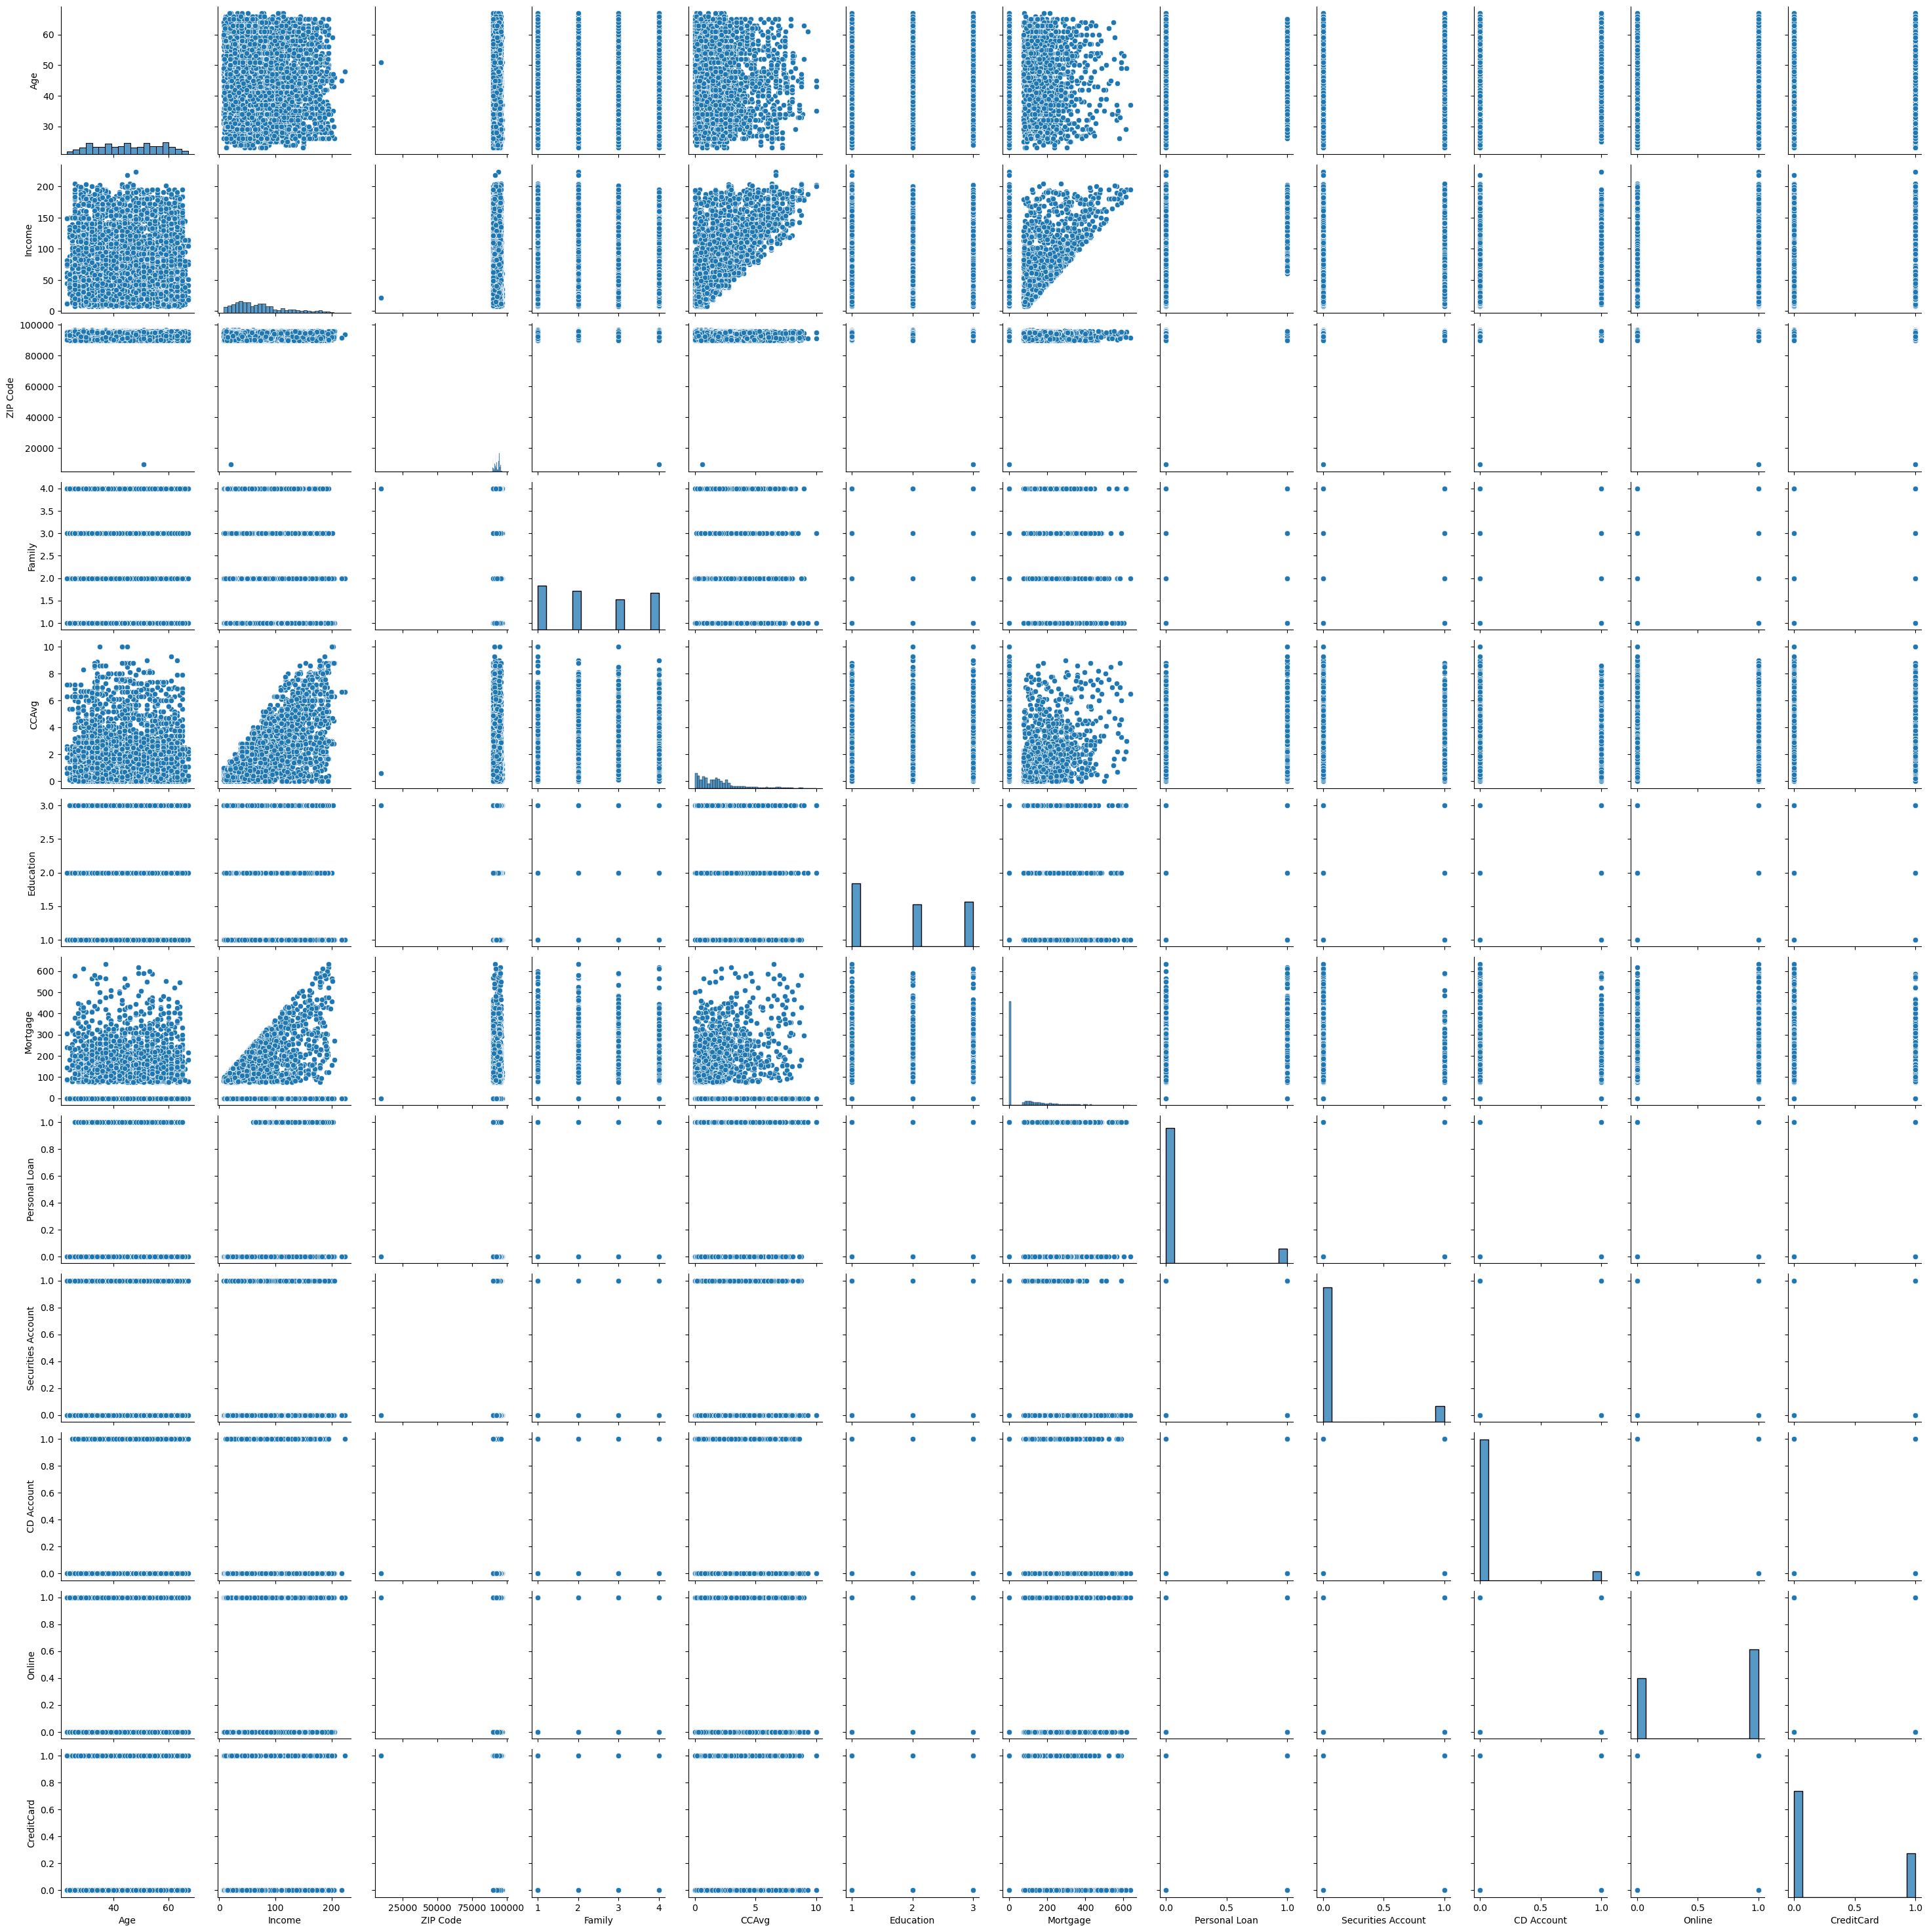

In [40]:
sns.pairplot(df)

# 4. Apply necessary transformations for the feature variables

In [41]:
data_X = df.loc[:, df.columns  != 'Personal Loan']
data_Y = df[['Personal Loan']]

In [42]:
# Applying the Yeo Johnson method of Transformation on the Income variable. 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X['Income'].values.reshape(-1,1))
temp = pt.transform(data_X['Income'].values.reshape(-1,1))
data_X['Income'] = pd.Series(temp.flatten())

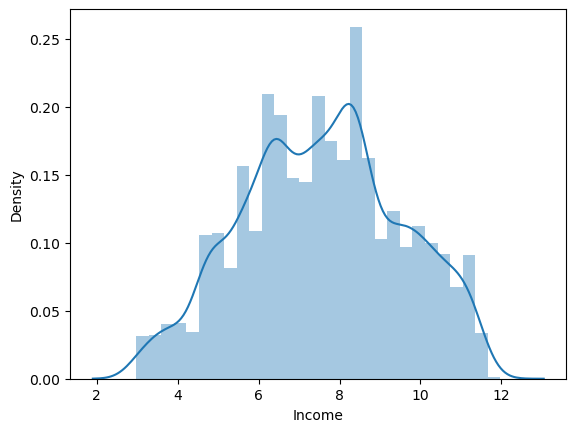

In [43]:
# Distplot to show transformed Income variable
sns.distplot(data_X['Income'])
plt.show()

In [44]:
# Applying the Yeo Johnson method of Transformation on the CCAvg variable.
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
temp = pt.transform(data_X['CCAvg'].values.reshape(-1,1))
data_X['CCAvg'] = pd.Series(temp.flatten())

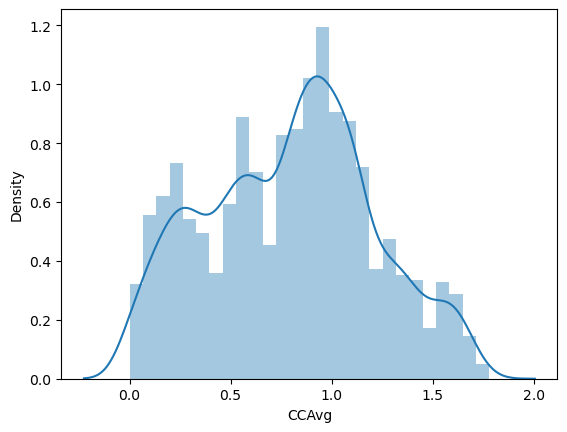

In [46]:
# Distplot to show transformed CCAvg variable
sns.distplot(data_X['CCAvg'])
plt.show()

In [47]:
# Binning on Mortgage variable.
data_X['Mortgage_Int'] = pd.cut(data_X['Mortgage'],
                               bins=[0,100,200,300,400,500,600,700],
                               labels= [0,1,2,3,4,5,6],
                               include_lowest =True)
data_X.drop('Mortgage', axis = 1, inplace= True)

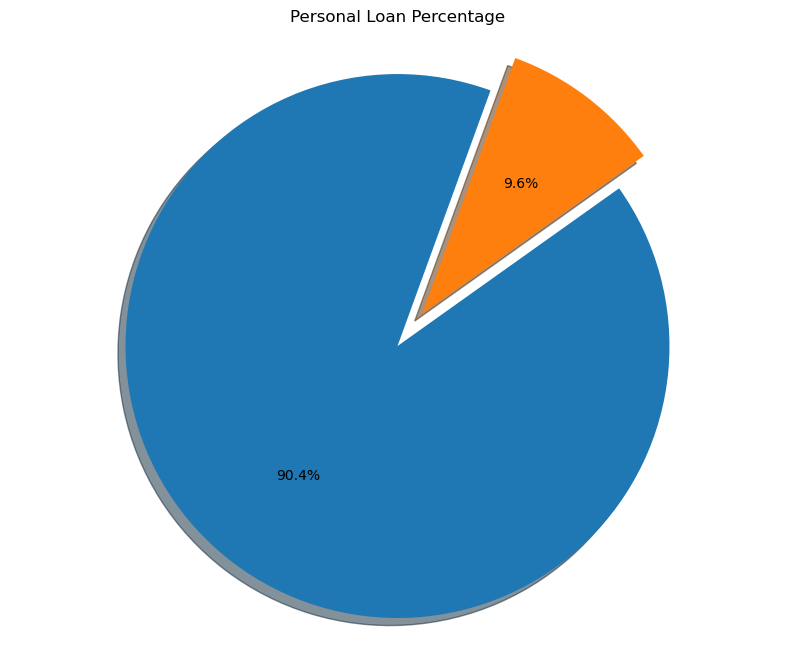

In [48]:
## Univariate Analysis
## 9.6% of all the applicants get approved for personal loan
tempDF = pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
tempDF.columns = ['Labels', 'Personal Loan']
fig1, ax1 = plt.subplots(figsize=(10,8))
explode = (0, 0.15)
ax1.pie(tempDF['Personal Loan'] , explode= explode, autopct= '%1.1f%%',
       shadow=True , startangle = 70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

In [49]:
# To display top 5 rows
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,91107,4,0.845150,1,1,0,0,0,0
1,45,5.876952,90089,3,0.814468,1,1,0,0,0,0
2,39,3.504287,94720,1,0.633771,1,0,0,0,0,0
3,35,8.983393,94112,1,1.107409,2,0,0,0,0,0
4,35,6.597314,91330,4,0.633771,2,0,0,0,1,0


# 5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively

In [50]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
# Splitting the data into train and test. We use stratify parameter of train_test_split function to get the same class distribution across train and test sets.
X_train,X_test,Y_train,Y_test = train_test_split(data_X,data_Y,test_size = 0.3, random_state = 0,stratify = data_Y)

In [52]:
X_train.reset_index(drop= True, inplace= True);
X_test.reset_index(drop= True, inplace= True);
Y_train.reset_index(drop= True, inplace= True);
Y_test.reset_index(drop= True, inplace= True);

In [53]:
# To display top 5 rows
X_train.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,5.058173,94301,3,0.322048,1,0,0,1,1,0
1,64,5.948841,90266,1,0.814468,2,1,0,0,0,0
2,52,5.651776,94923,4,0.902268,1,0,0,1,1,0
3,32,4.661500,93106,1,0.384643,3,0,0,1,0,1
4,62,7.097040,91320,1,0.544705,1,1,0,0,1,0


We will apply the StandardScaler to the dataset to standardize the input variables

In [54]:
for ind, column in enumerate(X_train.columns):
    scaler = StandardScaler()
    
    #fit to train data
    scaler.fit(X_train[[column]])
    
    #transform train data
    np_array = scaler.transform(X_train[[column]])
    X_train.loc[: , column] = pd.Series(np_array.flatten())
    
    #transform test data
    np_array = scaler.transform(X_test[[column]])
    X_test.loc[: , column] = pd.Series(np_array.flatten())
    

# 6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.

## Logistic Regression

In [55]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression(random_state = 0)

In [57]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [58]:
# Importing required libraries
from sklearn.metrics import confusion_matrix, recall_score , precision_score , f1_score , accuracy_score, roc_auc_score

In [59]:
X_test_pred1 = model.predict(X_test)
X_test_pred1

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
# Accuracy of train data
model.score(X_train, Y_train)

0.9568571428571429

In [61]:
# Accuracy of test data
model.score(X_test,Y_test)

0.9546666666666667

In [62]:
# Defining the Confusion Matrix
def Confusion_Matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_ylim([0,5])
    sns.heatmap(cm, annot=True, fmt= '.2f', xticklabels= [0,1], yticklabels=[0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [63]:
Y_test.shape

(1500, 1)

Confusion Matrix


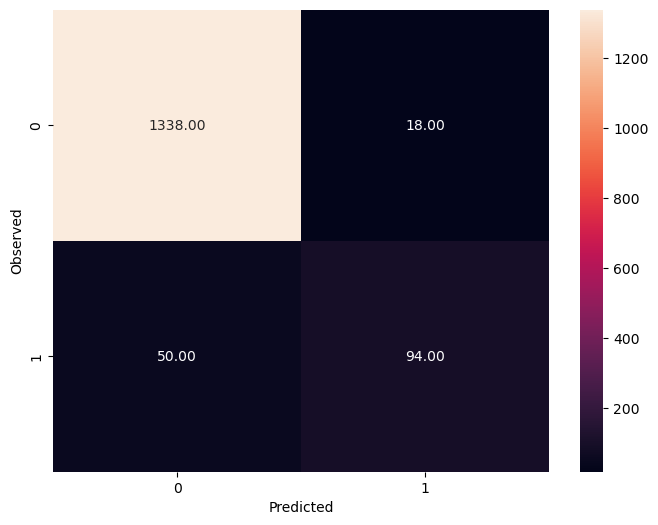

None


In [64]:
print('Confusion Matrix')
print(Confusion_Matrix(Y_test,X_test_pred1.reshape(-1,1)))

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,X_test_pred1.reshape(-1,1))
cm

array([[1338,   18],
       [  50,   94]], dtype=int64)

# 7. Print all the metrics related for evaluating the model performance

In [66]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.84      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [67]:
print("Roc Auc Score: ", roc_auc_score(Y_test,X_test_pred1))

Roc Auc Score:  0.819751720747296


For Logistic Regression we got 95% accuracy for test data. The F1 score is 0.73. Now lets compare that values with other models.

In [68]:
# Importing required libraries
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=500, max_depth=8)
model2.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [70]:
X_test_pred2 = model2.predict(X_test)
X_test_pred2

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
# Accuracy of train data
model2.score(X_train, Y_train)

0.9945714285714286

In [72]:
# Accuracy of test data
model2.score(X_test,Y_test)

0.9873333333333333

Confusion Matrix


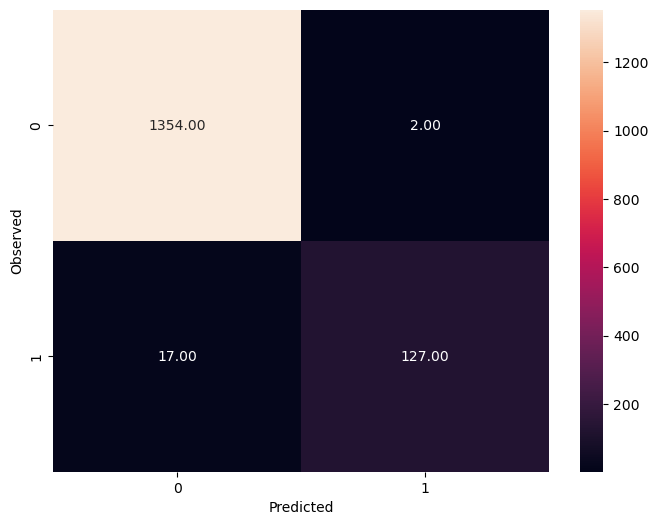

None


In [73]:
print('Confusion Matrix')
print(Confusion_Matrix(Y_test,X_test_pred2.reshape(-1,1)))

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,X_test_pred2.reshape(-1,1))
cm

array([[1354,    2],
       [  17,  127]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [76]:
print("Roc Auc Score: ", roc_auc_score(Y_test,X_test_pred2))

Roc Auc Score:  0.9402347590953786


The ROC AUC score and F1 score are higher then Logistic Regression model.

##  Decision Tree Classifier

Decision Trees (DTs) are a non-parametric <b>supervised learning</b> method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [77]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [78]:
model3 = DecisionTreeClassifier(random_state=0, max_depth=8)

In [79]:
model3.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [80]:
X_test_pred3 = model3.predict(X_test)
X_test_pred3

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
# Accuracy of train data
model3.score(X_train, Y_train)

0.996

In [82]:
# Accuracy of test data
model3.score(X_test,Y_test)

0.98

Confusion Matrix


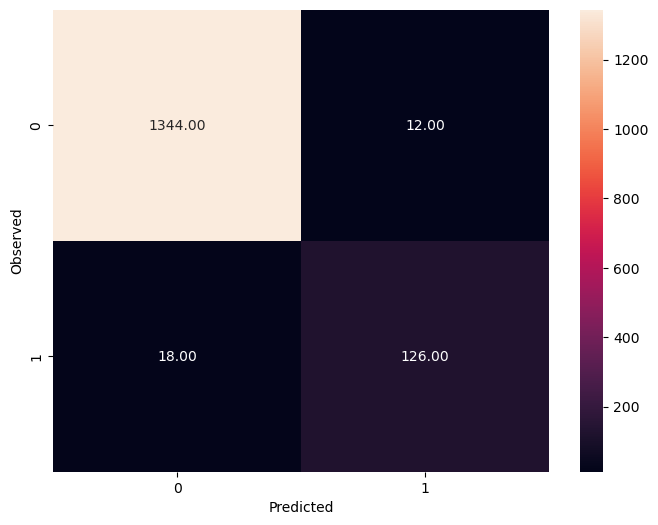

None


In [83]:
print('Confusion Matrix')
print(Confusion_Matrix(Y_test,X_test_pred3.reshape(-1,1)))

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,X_test_pred3.reshape(-1,1))
cm

array([[1344,   12],
       [  18,  126]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.88      0.89       144

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [86]:
print("Roc Auc Score: ", roc_auc_score(Y_test,X_test_pred3))

Roc Auc Score:  0.933075221238938


## Naive Bayes

Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

P(class|data) = (P(data|class) * P(class)) / P(data)   
Where P(class|data) is the probability of class given the provided data.

In [87]:
# Importing required libraries
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train,Y_train)

GaussianNB()

In [88]:
X_test_pred4 = model4.predict(X_test)
X_test_pred4

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
# Accuracy of train data
model4.score(X_train, Y_train)

0.9105714285714286

In [90]:
# Accuracy of test data
model4.score(X_test,Y_test)

0.9153333333333333

Confusion Matrix


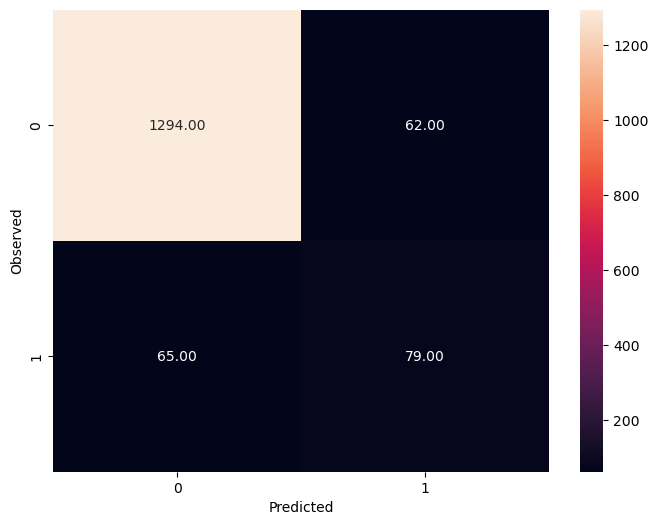

None


In [91]:
print('Confusion Matrix')
print(Confusion_Matrix(Y_test,X_test_pred4.reshape(-1,1)))

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,X_test_pred4.reshape(-1,1))
cm

array([[1294,   62],
       [  65,   79]], dtype=int64)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred4))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.56      0.55      0.55       144

    accuracy                           0.92      1500
   macro avg       0.76      0.75      0.75      1500
weighted avg       0.91      0.92      0.91      1500



In [94]:
print("Roc Auc Score: ", roc_auc_score(Y_test,X_test_pred4))

Roc Auc Score:  0.7514441986234022


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [99]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.958


In [100]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, Y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, Y_pred))



Precision: 0.8932038834951457
Recall: 0.6388888888888888


In [105]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [110]:
y_pred = rf.predict(X_test)

In [112]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.958


In [117]:
pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


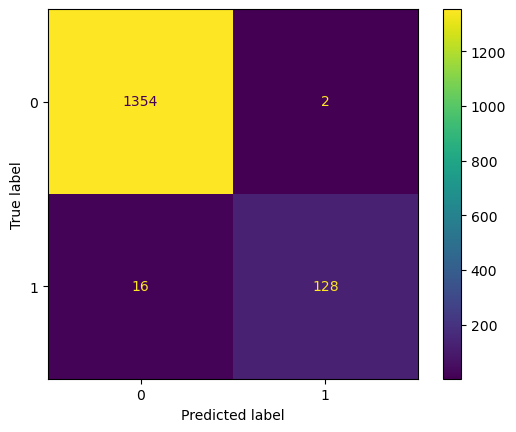

In [127]:
# Generate predictions with the best model
Y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [130]:
Y_pred =rf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.988
Precision: 0.9846153846153847
Recall: 0.8888888888888888
